In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.image as image

sns.set_theme()

In [19]:
G = nx.read_gml('rem_patients_gml/PP5.gml')

In [3]:
# Define colors for each node type
node_colors = {'B cell': 'yellow', 'Tumor': 'blue', 'T cell': 'green', 'Helper T cell': 'red', 'Killer T cell': 'pink', 'Macrophage': 'violet', 'Regulatory T cell': 'indigo','Other': 'orange'}

# Get node colors based on node type
colors = [node_colors[G.nodes[node]['type']] for node in G.nodes]

In [4]:
pos = nx.get_node_attributes(G, 'pos')

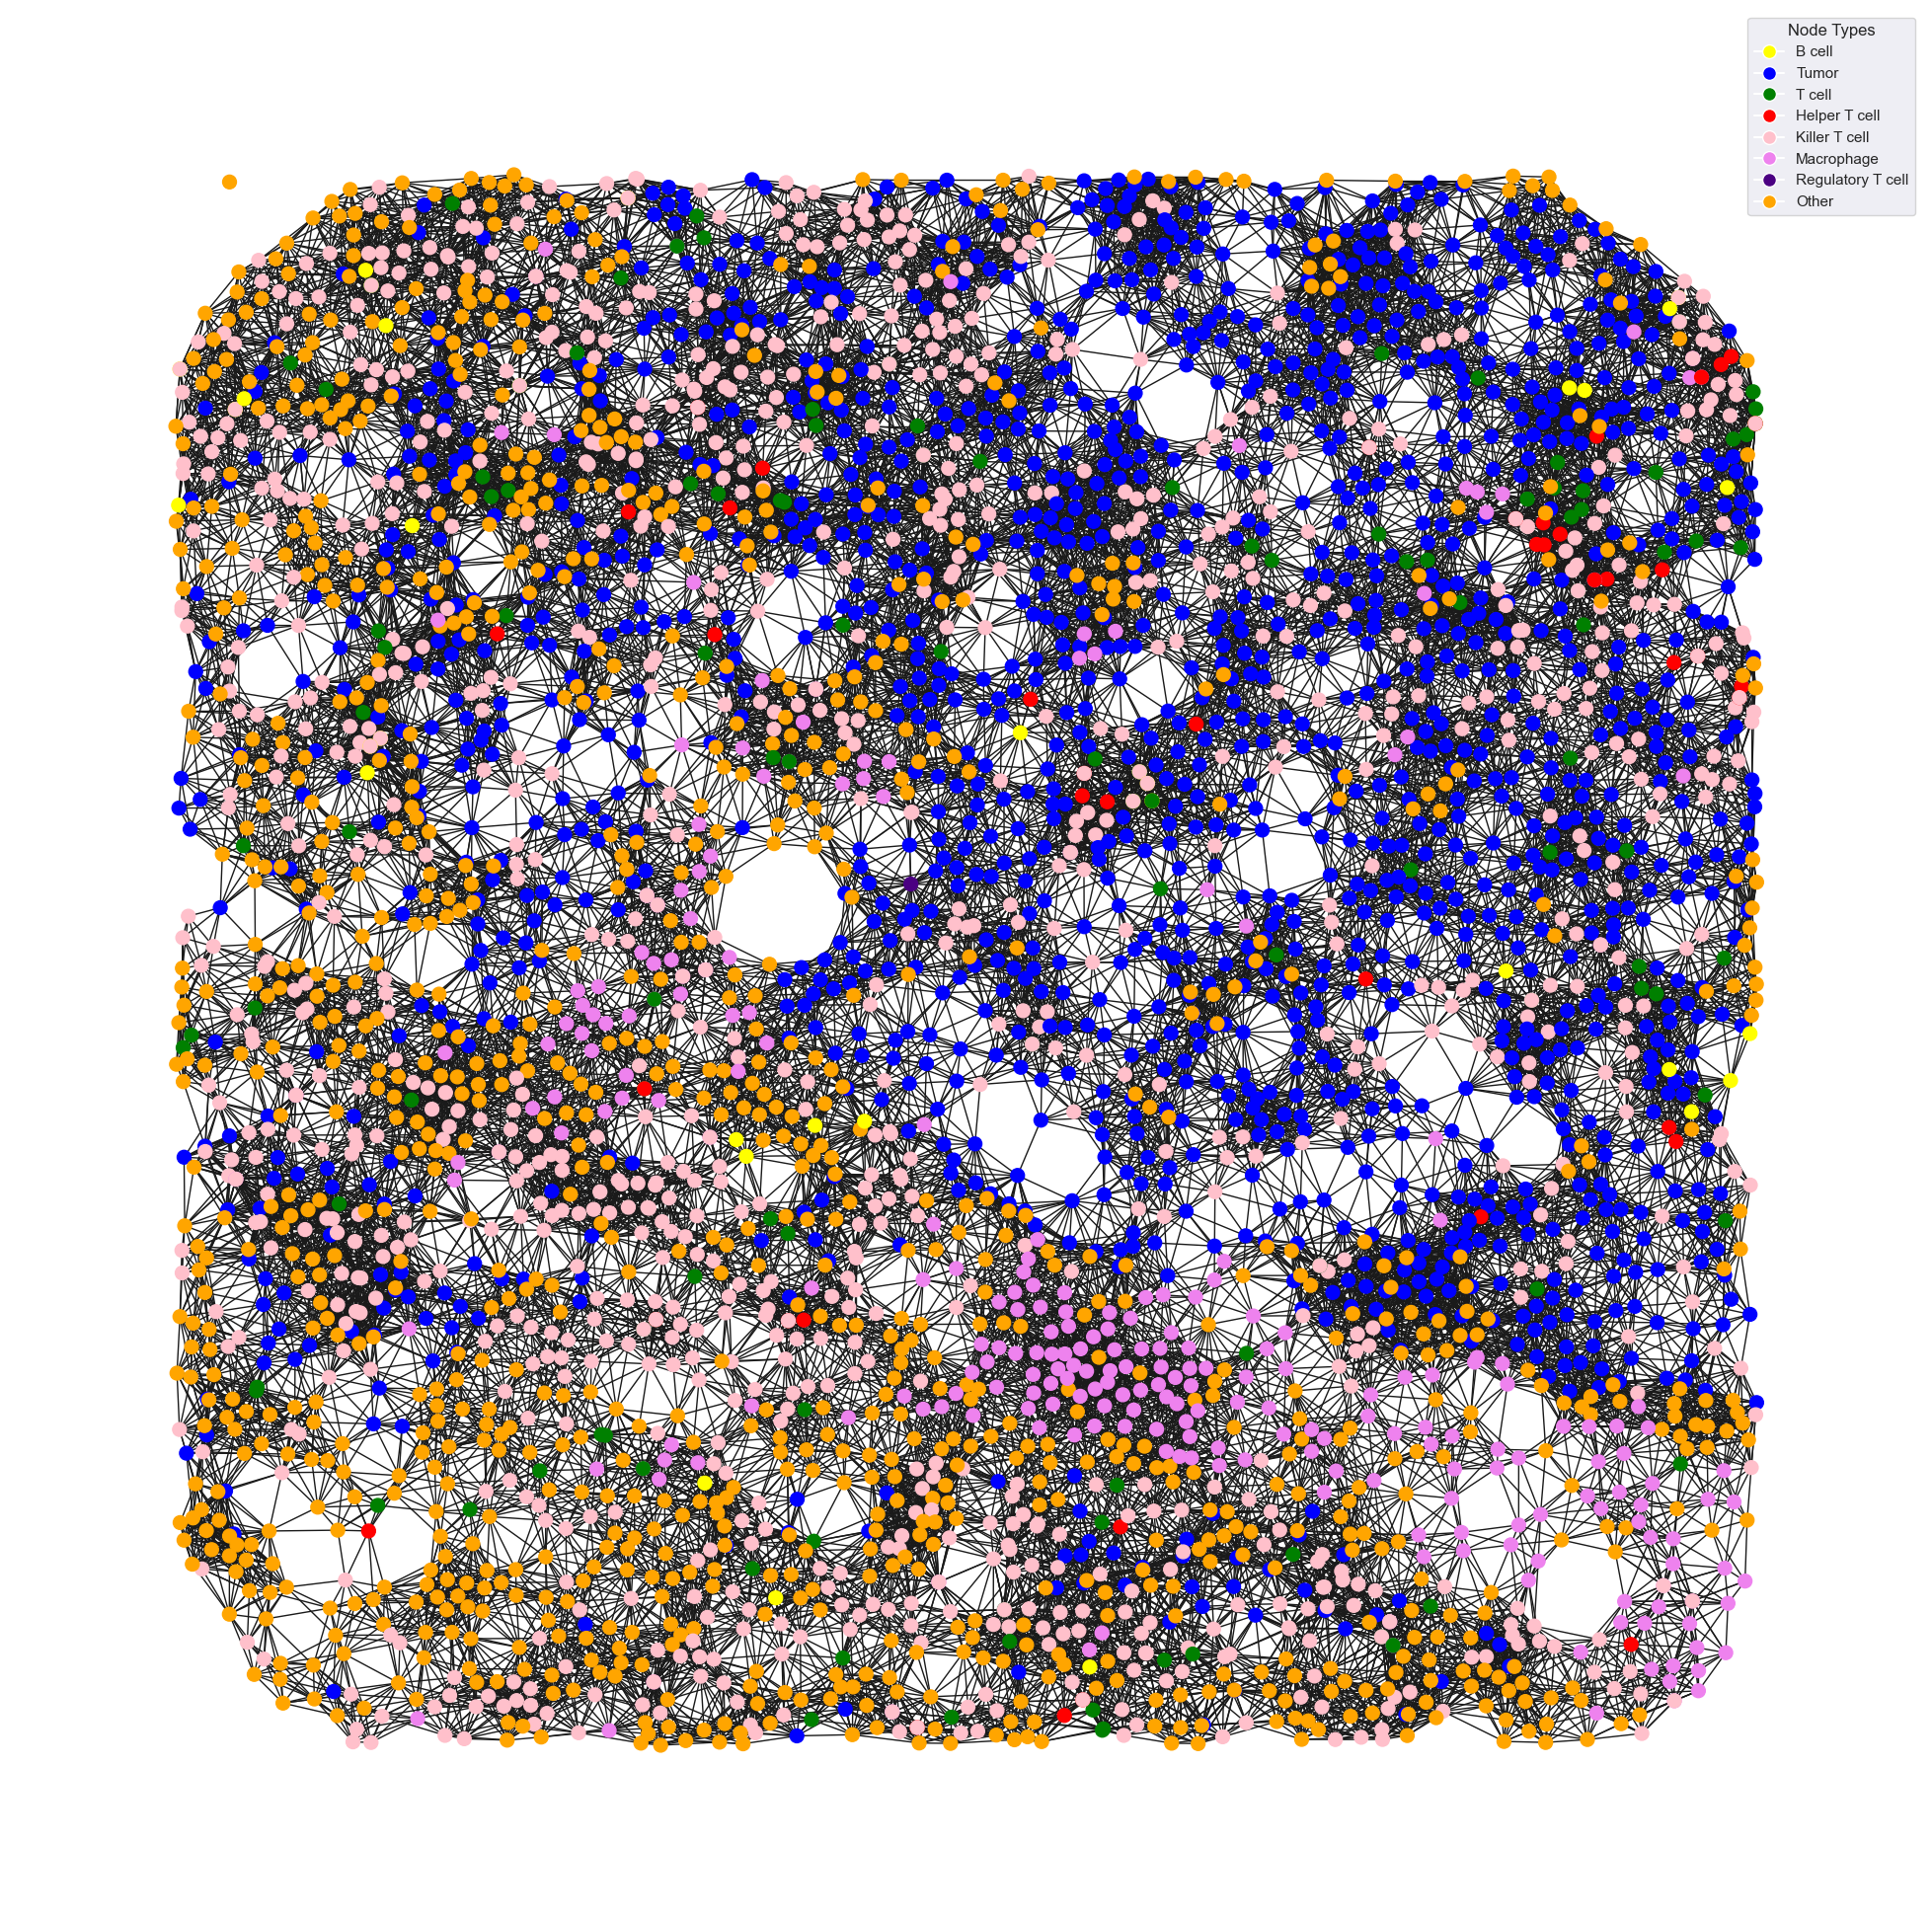

In [5]:
plt.figure(figsize=(25, 25))
legend_labels = {node_type: Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=node_type)
                 for node_type, color in node_colors.items()}

plt.legend(handles=legend_labels.values(), title='Node Types', loc='upper right')
nx.draw(G, pos, node_size=100, node_color=colors)
plt.show()

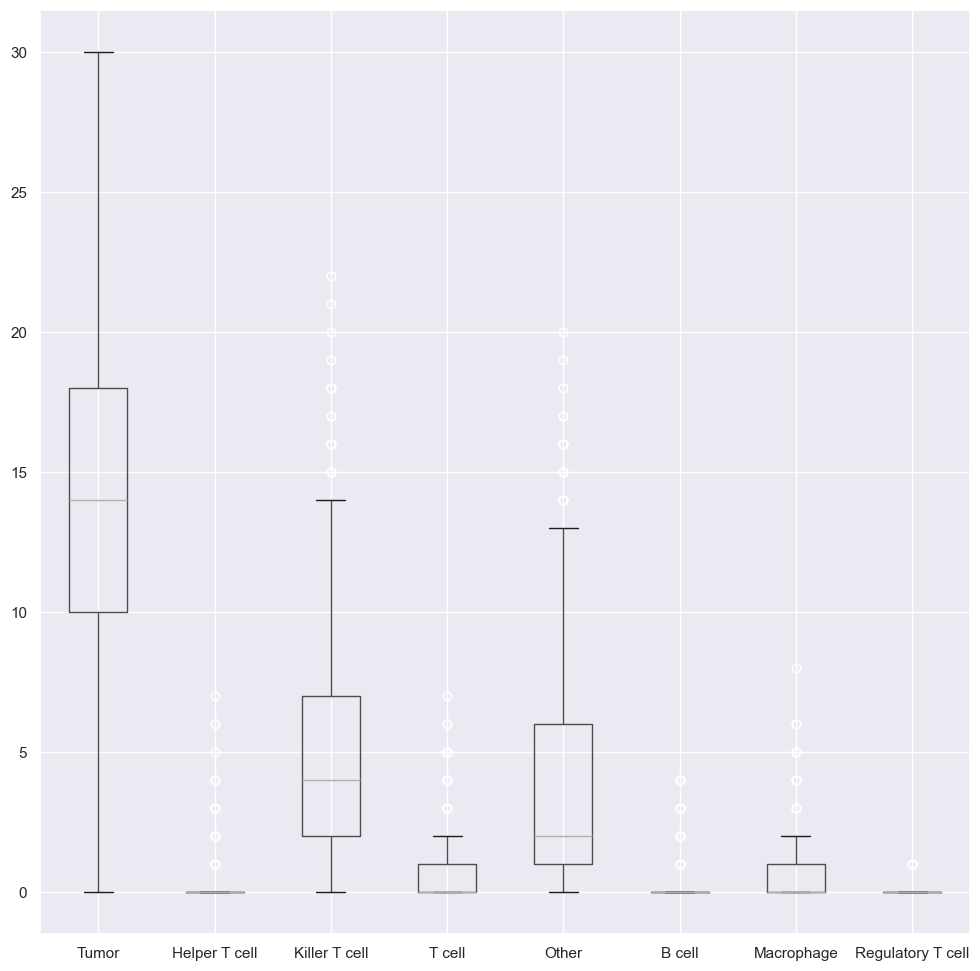

In [6]:
affinity_matrix = pd.DataFrame(columns=['node', 'Tumor', 'Helper T cell', 'Killer T cell', 'T cell', 'Other',
       'B cell', 'Macrophage', 'Regulatory T cell'])

blue_nodes = [node for node, data in G.nodes(data=True) if data.get('type') == 'Tumor']

for node in blue_nodes:
    neighbor_counts = {column: 0 for column in affinity_matrix.columns[1:]}
    neighbor_counts['node'] = node
    for neighbor in G.neighbors(node):
        type_node = G.nodes[neighbor]['type']
        neighbor_counts[type_node] += 1
    
    neighbor_counts_df = pd.DataFrame([neighbor_counts], columns=affinity_matrix.columns)
    affinity_matrix = pd.concat([affinity_matrix, neighbor_counts_df], ignore_index=True)

numeric_cols = affinity_matrix.columns.difference(['node'])
affinity_matrix[numeric_cols] = affinity_matrix[numeric_cols].apply(pd.to_numeric, errors='coerce')


plt.figure(figsize=(12, 12))
boxplot = affinity_matrix.drop('node', axis=1).boxplot(column=list(affinity_matrix.columns[1:]))
plt.show()

In [21]:
for node_type in ['Helper T cell', 'Killer T cell', 'T cell', 'Other', 'B cell', 'Macrophage', 'Regulatory T cell']:
    tumor_subgraph = G.subgraph([node for node, data in G.nodes(data=True) if data.get('type') == node_type])
    nx.write_gml(tumor_subgraph, f"Comp/{node_type}.gml")

In [8]:
# plt.figure(figsize=(12, 12))
# nx.draw(tumor_subgraph, pos=nx.get_node_attributes(tumor_subgraph, 'pos'), node_color='blue', node_size=100)
# plt.show()

In [56]:
tumor_subgraph_1 = nx.read_gml('subgraphs/Cold/Macrophage.gml')
tumor_subgraph_2 = nx.read_gml('subgraphs/Comp/Macrophage.gml')
tumor_subgraph_3 = nx.read_gml('subgraphs/Mixed/Macrophage.gml')

In [57]:
tumor_subgraphs = [tumor_subgraph_1, tumor_subgraph_2, tumor_subgraph_3]

In [58]:
poss = []
for i in tumor_subgraphs:
    poss.append(nx.spring_layout(i))

In [59]:
titles = ['Cold Patient', 'Compartmentalized Patient', 'Mixed Patient']

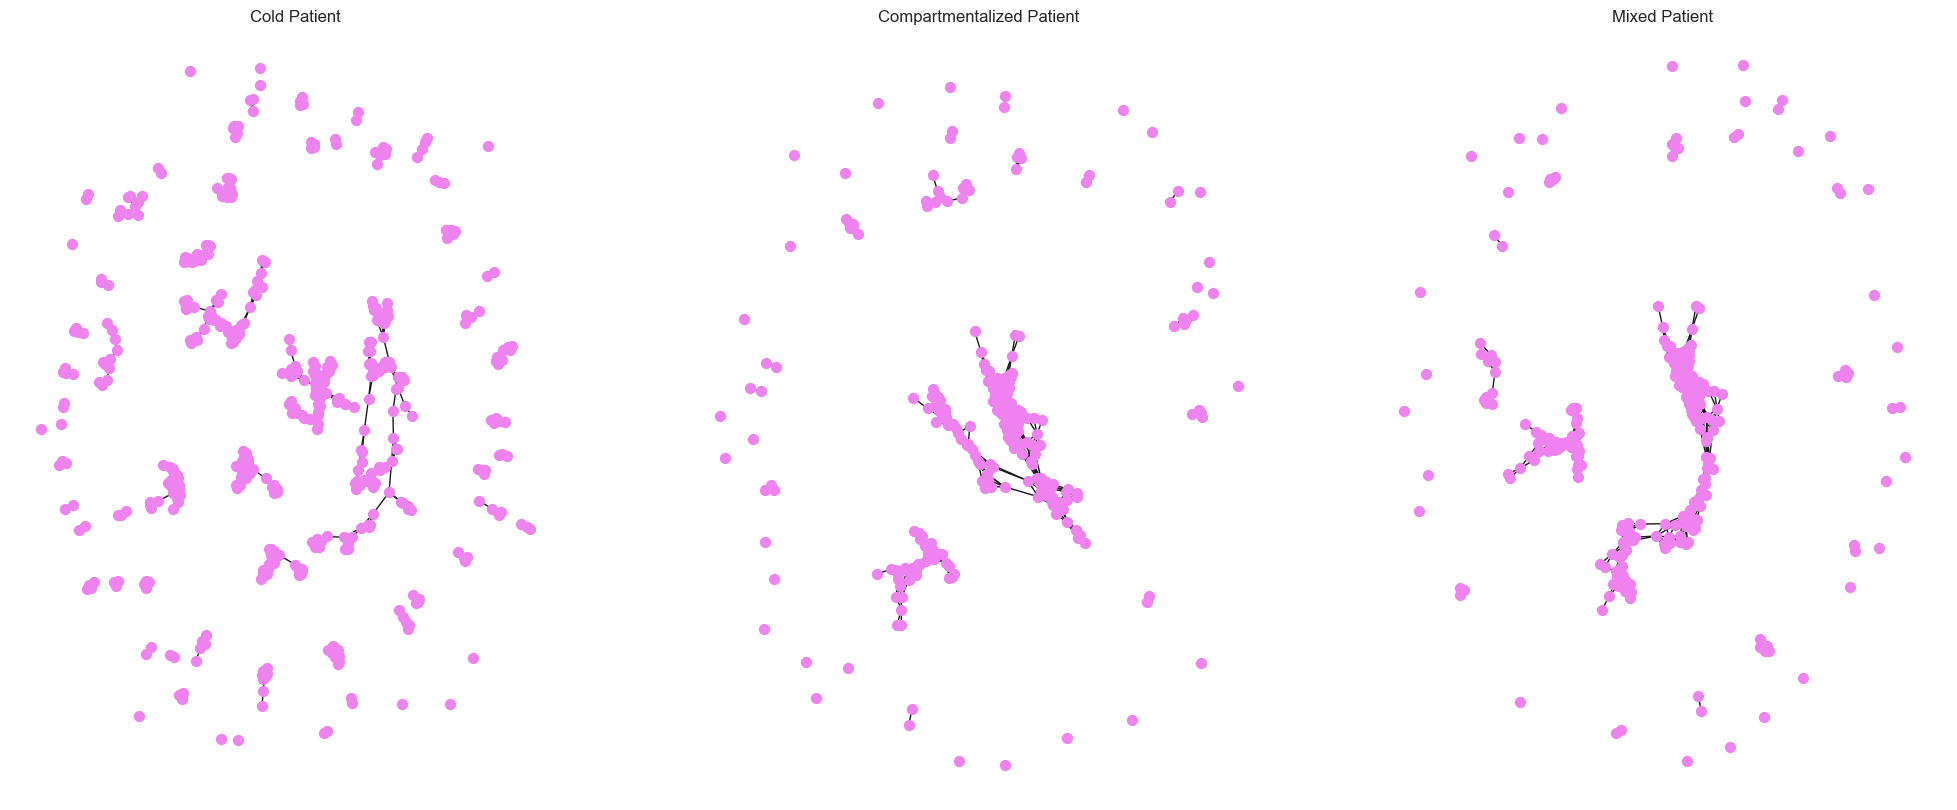

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

for i in range(len(axs)):
    nx.draw(tumor_subgraphs[i], pos=poss[i], ax=axs[i], node_size=50, node_color='violet')
    axs[i].title.set_text(titles[i])

plt.show()